In [3]:
import numpy as np
import pandas as pd

In [4]:
DataFrame = pd.read_csv("linear.csv")

In [5]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 2 columns):
x    100 non-null float64
y    92 non-null float64
dtypes: float64(2)
memory usage: 2.3 KB


In [7]:
DataFrame.keys()

Index([u'x', u'y'], dtype='object')

In [8]:
DataFrame.count()

x    100
y     92
dtype: int64

In [10]:
DataFrame2 = DataFrame.dropna()
DataFrame2.count()

x    92
y    92
dtype: int64

In [11]:
DataFrame3 = DataFrame2.drop_duplicates()
DataFrame3.count()

x    92
y    92
dtype: int64

In [12]:
DataFrame3.describe()

,x,y
count,92.000000,92.000000
mean,52.706610,87.915132
std,29.401970,47.093222
min,0.016737,-6.236295
25%,29.012087,47.682375
50%,55.255856,93.547792
75%,78.828680,130.866392
max,99.432294,166.164544


In [13]:
DataFrame3.corr()

,x,y
x,1.000000,0.988446
y,0.988446,1.000000


In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


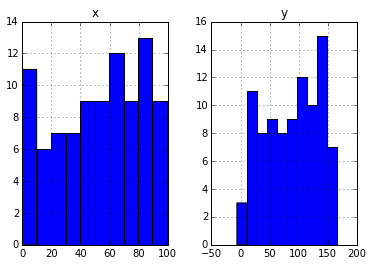

In [185]:
DataFrame3.hist()
plt.show()

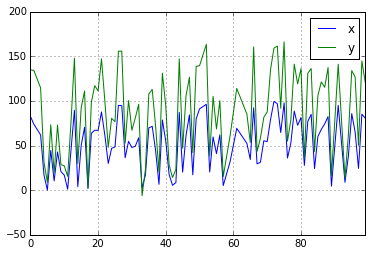

In [184]:
DataFrame3.plot()
plt.show()

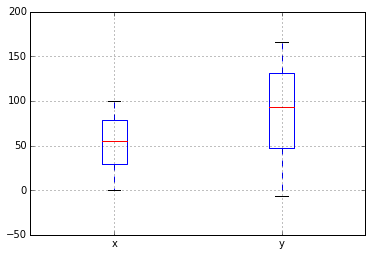

In [183]:
DataFrame3.boxplot()
plt.show()

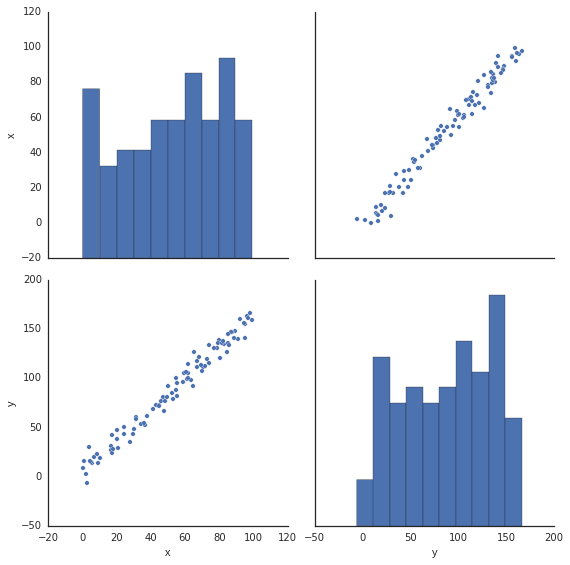

In [212]:
import seaborn as sns
sns.set(style="white", color_codes=True)

sns.pairplot(DataFrame3, size=4)
plt.show()

In [195]:
DataArray = np.array(DataFrame3)

In [196]:
from numpy import array

x_list = []
y_list = []
for i in range(len(DataArray)):
    tmpx = []
    tmpx.append(DataArray[i,0])
    x_list.append(tmpx)
    y_list.append(DataArray[i,1])

X = array(x_list)
y = array(y_list)

In [197]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(73, 1)
(73,)
(19, 1)
(19,)


Fitting a linear regression model using sklearn's **LinearRegression** package.

In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold, cross_val_score
#import matplotlib.pyplot as plt

In [199]:
LinReg = LinearRegression(n_jobs=-1)
LinReg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [200]:
kfold = KFold(len(X), n_folds = 5)
scores= cross_val_score(LinReg, X, y, cv=kfold, n_jobs=-1)
print("Accuracy: %0.4f (+/- %0.4f)" %(np.mean(scores), 2*np.std(scores)))

Accuracy: 0.9735 (+/- 0.0102)


In [201]:
lnr = LinReg.fit(X_train, y_train)

In [202]:
# The coefficients
print("Coefficients: %.5f" % lnr.coef_[0])
# The mean square error
print("Residual sum of squares: %.2f" % np.mean((lnr.predict(X_test) - y_test)**2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lnr.score(X_test, y_test))

print("Formula: y = {0} x + {1}".format(lnr.coef_[0], lnr.intercept_))

Coefficients: 1.58205
Residual sum of squares: 43.30
Variance score: 0.98
Formula: y = 1.58204685244 x + 4.72668629242


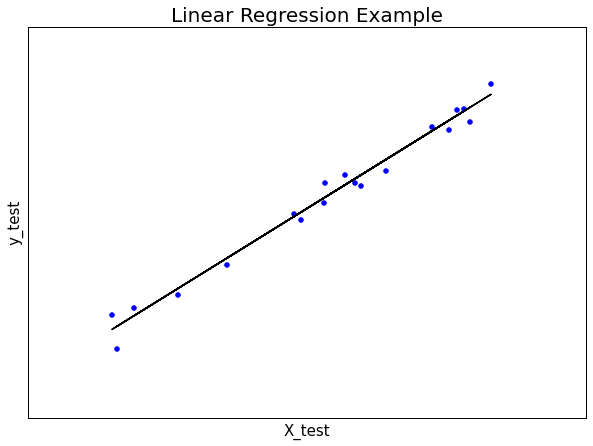

In [206]:
plt.figure(figsize=(10,7))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, lnr.predict(X_test), color='black', linewidth=1.5)
plt.title('Linear Regression Example', fontsize = 20)
plt.xlabel('X_test', fontsize = 15)
plt.ylabel('y_test', fontsize = 15)

plt.xticks(())
plt.yticks(())

plt.show()

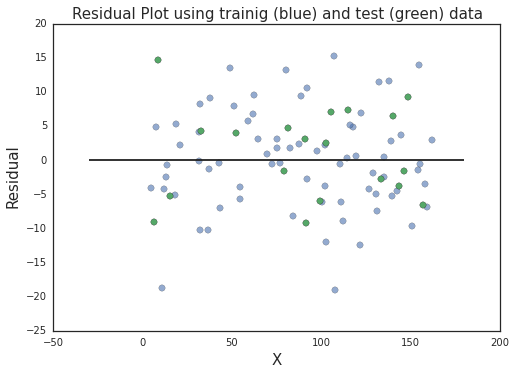

In [236]:
plt.scatter(lnr.predict(X_train), lnr.predict(X_train) - y_train, c="b", s=40, alpha=0.6)
plt.scatter(lnr.predict(X_test ), lnr.predict(X_test ) - y_test , c="g", s=40)
plt.hlines(y = 0, xmin = -30, xmax = 180)
plt.title("Residual Plot using trainig (blue) and test (green) data", size = 15)
plt.ylabel("Residual", size = 15)
plt.xlabel("X", size = 15)
plt.show()